Created on 2023-08-21
This notebook ...

TODO: Notebook description

In [1]:
## Library imports
import os
from utils import select_files, create_directory, getclosest_ij
from helper import create_fieldset, create_particleset, create_kernel, load_default_settings, load_test_settings
from parcels import ParticleFile
#from plotting import plot_release_locations
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import numpy as np

In [2]:
os.getcwd()

'/Users/denes001/Research/Projects/PlasticParcels/PlasticParcels/src/trajectory'

# User options
TODO: Write a description here

In [3]:
## User options
testing_version = 'local'
if testing_version == 'local':
    user_settings = {'user': 'denes001',
                    'output_directory': '../../data/output_data/',
                    'fig_directory': '../../fig/',
                    }
else:
    user_settings = {'user': 'denes001',
                    'output_directory': '/storage/shared/oceanparcels/output_data/data_Michael/PlasticTransportKernels/data/output_data/',
                    'fig_directory': '/storage/shared/oceanparcels/output_data/data_Michael/PlasticTransportKernels/fig/',
                    }

## Create directories if missing
create_directory(user_settings['output_directory'])
create_directory(user_settings['fig_directory'])

# Model settings
TODO: Write a description here

In [4]:
## Model settings
model_settings, particle_settings = load_test_settings()
#model_settings, particle_settings = load_default_settings()

In [5]:
#model_settings['mode'] = '2D'
#model_settings['mixing_f'] = False
#model_settings['biofouling_f'] = False
#model_settings['stokes_f'] = False
#model_settings['wind_f'] = False



In [6]:
fieldset = create_fieldset(model_settings, particle_settings)

## Plotting fields
Note - the plots below aren't ~exactly~ the velocity fields loaded, since the plotting assumes plotting at T-points (or an A-grid) and we've loaded a C-grid

In [7]:
## Load data into memory
fieldset.computeTimeChunk(0,1)

21600

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


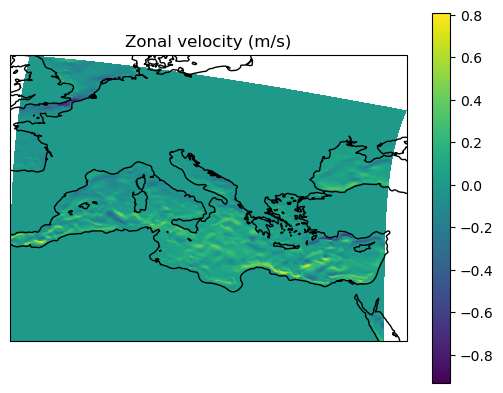

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


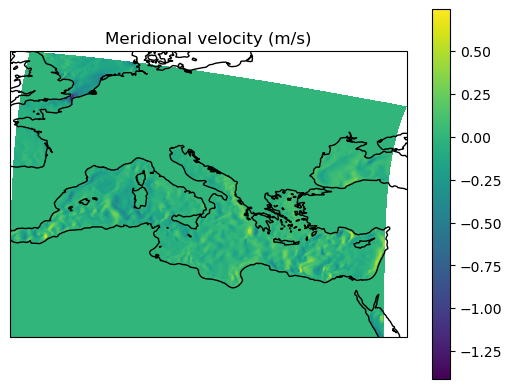

In [8]:
## Plot velocity fields
# Plot U
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
cbar = ax.pcolormesh(fieldset.U.grid.lon, fieldset.U.grid.lat, fieldset.U.data[0,0], transform=ccrs.PlateCarree()) # Plotting first time instance, and first depth level
ax.coastlines()
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(cbar)
plt.title("Zonal velocity (m/s)")
plt.show()

# Plot V
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
cbar = ax.pcolormesh(fieldset.V.grid.lon, fieldset.V.grid.lat, fieldset.V.data[0,0], transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(cbar)
plt.title("Meridional velocity (m/s)")
plt.show()

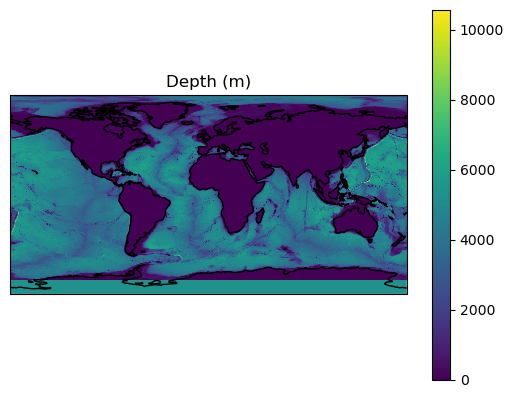

In [9]:
# Plot bathymetry
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
cbar = ax.pcolormesh(fieldset.bathymetry.grid.lon, fieldset.bathymetry.grid.lat, fieldset.bathymetry.data[0], transform=ccrs.PlateCarree())
ax.coastlines()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(cbar)
plt.title("Depth (m)")
plt.show()

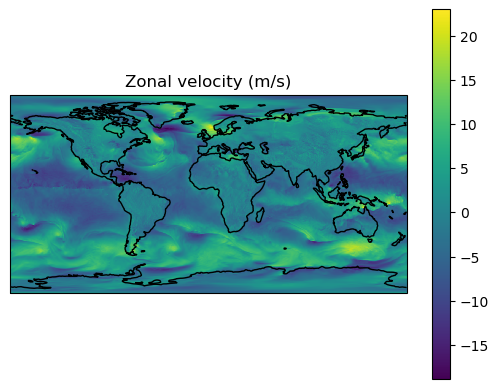

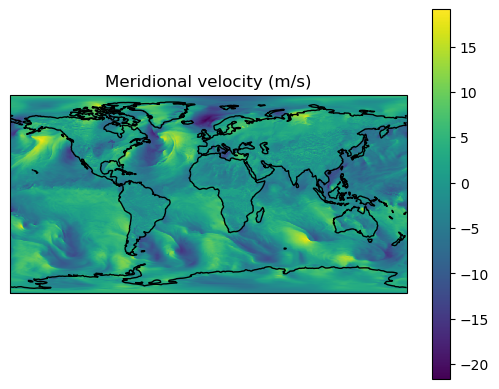

In [10]:
## Plot Wind velocity fields
# Plot Wind_U
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
cbar = ax.pcolormesh(fieldset.Wind_U.grid.lon, fieldset.Wind_U.grid.lat, fieldset.Wind_U.data[0], transform=ccrs.PlateCarree()) # Plotting first time instance, and first depth level
ax.coastlines()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(cbar)
plt.title("Zonal velocity (m/s)")
plt.show()

# Plot V
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
cbar = ax.pcolormesh(fieldset.Wind_V.grid.lon, fieldset.Wind_V.grid.lat, fieldset.Wind_V.data[0], transform=ccrs.PlateCarree())
ax.coastlines()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(cbar)
plt.title("Meridional velocity (m/s)")
plt.show()

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


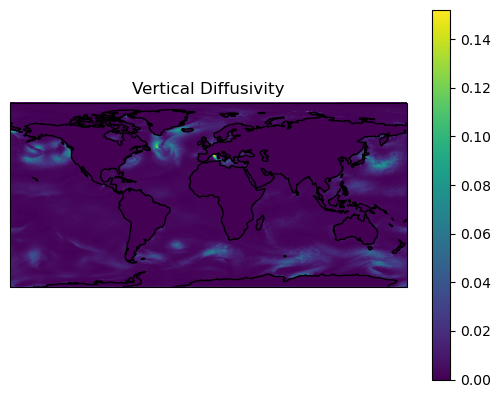

In [11]:
## Plot Vertical Diffusivity field
# Plot Wind_U
fig = plt.figure()#figsize=(10,5), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
cbar = ax.pcolormesh(fieldset.mixing_kz.grid.lon, fieldset.mixing_kz.grid.lat, fieldset.mixing_kz.data[0,0], transform=ccrs.PlateCarree()) # Plotting first time instance, and first depth level
ax.coastlines()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(cbar)
plt.title("Vertical Diffusivity")
plt.show()

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


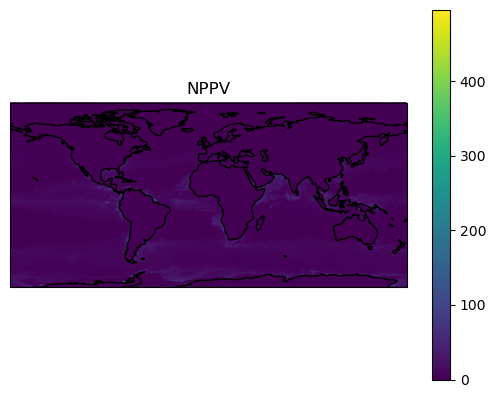

In [12]:
## Plot Vertical Diffusivity field
# Plot Wind_U
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
cbar = ax.pcolormesh(fieldset.pp_phyto.grid.lon, fieldset.pp_phyto.grid.lat, fieldset.pp_phyto.data[0,0], transform=ccrs.PlateCarree()) # Plotting first time instance, and first depth level
ax.coastlines()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(cbar)
plt.title("NPPV")
plt.show()

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


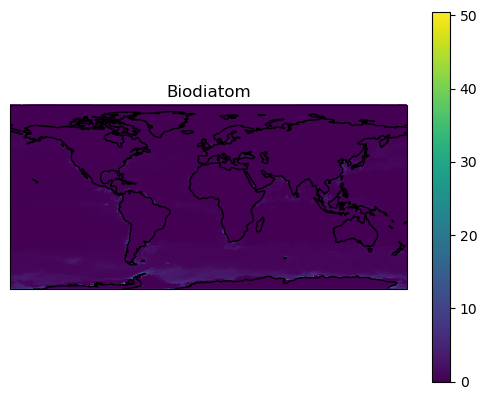

In [13]:
## Plot Vertical Diffusivity field
# Plot Wind_U
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
cbar = ax.pcolormesh(fieldset.bio_diatom.grid.lon, fieldset.bio_diatom.grid.lat, fieldset.bio_diatom.data[0,0], transform=ccrs.PlateCarree()) # Plotting first time instance, and first depth level
ax.coastlines()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(cbar)
plt.title("Biodiatom")
plt.show()

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


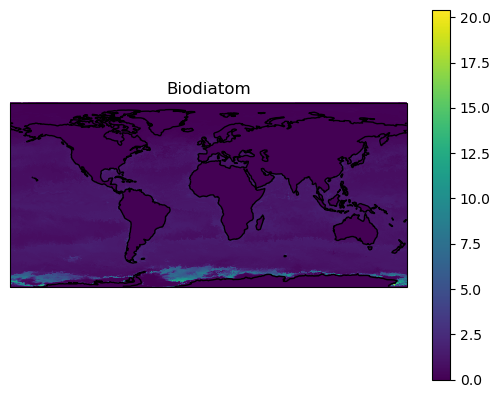

In [14]:
## Plot Vertical Diffusivity field
# Plot Wind_U
fig = plt.figure()#figsize=(10,5), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
cbar = ax.pcolormesh(fieldset.bio_nanophy.grid.lon, fieldset.bio_nanophy.grid.lat, fieldset.bio_nanophy.data[0,0], transform=ccrs.PlateCarree()) # Plotting first time instance, and first depth level
ax.coastlines()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(cbar)
plt.title("Biodiatom")
plt.show()

## Interpolating at points

In [15]:
fieldset.bathymetry[0,0,0,0]

4933.0

In [16]:
## Turn off wind and stokes because need a land_currents.nc with depth following bathymetry (or a fix like Mikael had at the end of his markov_0_mixing kernel? Not hard to implement, just need to test!)
## The below doenst work, have to set the fieldset parameters...#
#model_settings['stokes_f'] = False
#model_settings['wind_f'] = False

fieldset.stokes_f = 1
fieldset.wind_f = 1


## Creating a simple particle set

In [28]:
## Set particle release locations
n_particles = 5
lons = np.linspace(2,7,n_particles)
lats = np.linspace(40,42,n_particles)
depths = np.random.uniform(0,50, n_particles)
#times = np.linspace(0,50000,n_particles)

release_locations = {'lons': lons,
                     'lats': lats,
                     'depths': depths,
}

# Other settings
wind_test = np.random.uniform(0,0.05,n_particles)
density_test = np.random.uniform(1000,1050,n_particles)
diameter_test = np.random.uniform(0.00001, 0.01, n_particles)
## Particleset settings
particle_settings.update({'release_locations': release_locations, # A dictionary of lons, lats, depths (optional), and times (optional)
                          'windage_coefficient': wind_test, # A float or Nx1 array of windage coefficients, values in [0,1] [percent of wind speed]
                          'particle_density': density_test, # A float or Nx1 array of particle densities [kg m-3]
                          'particle_diameter': diameter_test, # A float or Nx1 array of particle lengths [m]
                          'write_output_option': 'none' # Option to write variables. Options: 'none' (default), 'tracer' (saves tracer fields), 'dynamic' (saves all variables that change spatiotemporally), 'all' (saves all variables)
                           })
pset = create_particleset(fieldset, particle_settings)
kernels = create_kernel(fieldset, pset)

In [29]:
pset

P[5](lon=2.000000, lat=40.000000, depth=35.051941, time=not_yet_set)
P[6](lon=3.250000, lat=40.500000, depth=14.822474, time=not_yet_set)
P[7](lon=4.500000, lat=41.000000, depth=29.648528, time=not_yet_set)
P[8](lon=5.750000, lat=41.500000, depth=4.847143, time=not_yet_set)
P[9](lon=7.000000, lat=42.000000, depth=19.252238, time=not_yet_set)

In [30]:
kernels

[<function kernels.PolyTEOS10_bsq(particle, fieldset, time)>,
 <function parcels.application_kernels.advection.AdvectionRK4_3D(particle, fieldset, time)>,
 <function kernels.biofouling(particle, fieldset, time)>,
 <function kernels.Stokes_drift(particle, fieldset, time)>,
 <function kernels.windage_drift(particle, fieldset, time)>,
 <function kernels.vertical_mixing(particle, fieldset, time)>,
 <function kernels.unbeaching(particle, fieldset, time)>,
 <function kernels.checkThroughBathymetry(particle, fieldset, time)>,
 <function kernels.checkErrorThroughSurface(particle, fieldset, time)>,
 <function kernels.periodicBC(particle, fieldset, time)>,
 <function kernels.deleteParticle(particle, fieldset, time)>]

In [31]:
#kernels.pop(3) # Remove stokes drift, I think it kicks the particle into land and then interpolation gets funky
#kernels.pop(2) # Remove biofouling to see if that is the cause of nans

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


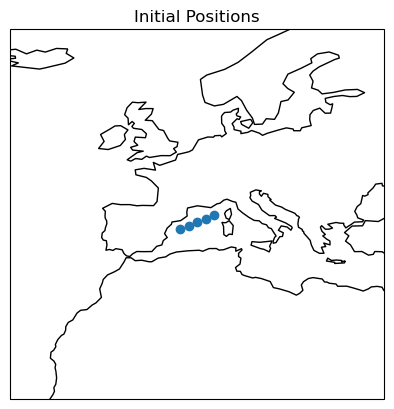

INFO: Output files are stored in ../../data/output_data/trajectory/PolyTEOS10_bsq|AdvectionRK4_3D|biofouling|Stokes_drift|windage_drift|vertical_mixing|unbeaching|checkThroughBathymetry|checkErrorThroughSurface|periodicBC|deleteParticle.zarr.
100%|██████████| 259200.0/259200.0 [01:24<00:00, 3072.35it/s]


/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


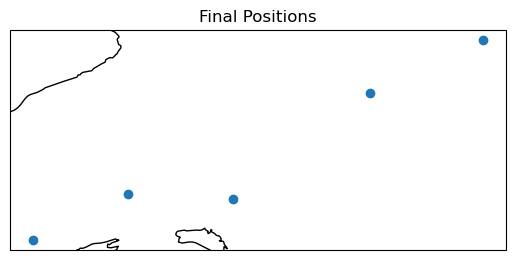

____________________ 
 Success with PolyTEOS10_bsq|AdvectionRK4_3D|biofouling|Stokes_drift|windage_drift|vertical_mixing|unbeaching|checkThroughBathymetry|checkErrorThroughSurface|periodicBC|deleteParticle
 ____________________


In [32]:

kernel_name = '|'.join([kernel.__name__ for kernel in kernels])
# Plot locations
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
plt.title("Initial Positions")
plt.show()

pfile = ParticleFile(user_settings['output_directory']+'trajectory/'+kernel_name+'.zarr', pset, outputdt=particle_settings['dt_write'])
pset.execute(kernels, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)


#Plot locations final
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
plt.title("Final Positions")
plt.show()
print("____________________ \n Success with", kernel_name +'\n ____________________')


In [33]:
pset

P[5](lon=2.318457, lat=39.957264, depth=0.500000, time=258000.000000)
P[6](lon=3.310598, lat=40.435351, depth=1.439195, time=258000.000000)
P[7](lon=4.399362, lat=40.383431, depth=0.500000, time=258000.000000)
P[8](lon=5.811394, lat=41.481568, depth=2578.559814, time=258000.000000)
P[9](lon=6.992524, lat=42.030305, depth=2713.879150, time=258000.000000)

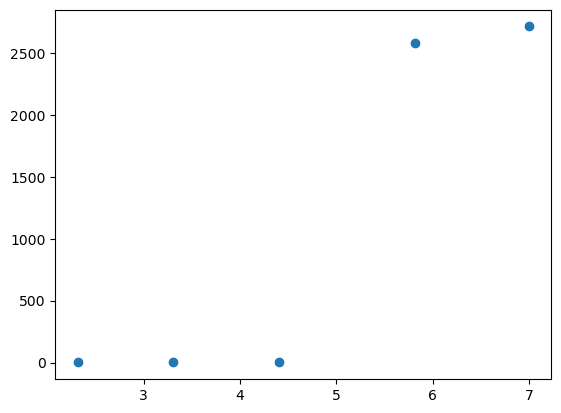

In [34]:
plt.scatter(pset.lon, pset.depth)
plt.show()

In [35]:
kernel_name

'PolyTEOS10_bsq|AdvectionRK4_3D|biofouling|Stokes_drift|windage_drift|vertical_mixing|unbeaching|checkThroughBathymetry|checkErrorThroughSurface|periodicBC|deleteParticle'

In [36]:
import xarray as xr

In [37]:
pset_df = xr.open_dataset(user_settings['output_directory']+'trajectory/'+kernel_name+'.zarr')

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [38]:
pset_df['z'].data

array([[3.50519413e+01, 5.00000000e-01, 5.00000000e-01],
       [1.48224736e+01, 5.00000000e-01, 2.75236692e+01],
       [2.96485285e+01, 5.00000000e-01, 5.00000000e-01],
       [4.84714266e+00, 2.56791235e+03, 2.57326562e+03],
       [1.92522376e+01, 2.71387915e+03, 2.71387915e+03]])

## Creating a plastic release particle set

# Particleset settings
TODO: Write description here -- user must define particle release locations

In [ ]:


## Show particle release locations
#plot_release_locations(release_locations)

# Kernel creation
This should be pretty simple based on the flags above

In [ ]:
len_kernels = len(kernels)

In [ ]:
[kernels[0]]

In [ ]:
kernels

In [ ]:
for i in range(len_kernels-3):
    #Reset the particle set and kernels
    pset = create_particleset(fieldset, particle_settings)
    kernels = create_kernel(fieldset, pset)
    
    # Plot locations
    fig = plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
    plt.title("Initial")
    plt.show()


    test_kernel=kernels[i]
    kernels = [test_kernel, kernels[-3], kernels[-2], kernels[-1]]
    try:
        print("____________________ \n Testing with", test_kernel.__name__ +'\n ____________________')
        pfile = ParticleFile(user_settings['output_directory']+'trajectory/'+test_kernel.__name__+'.zarr', pset, outputdt=particle_settings['dt_write'])
        pset.execute(kernels, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)
        

        #Plot locations final
        fig = plt.figure()
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
        plt.title("Final")
        plt.show()
        print("____________________ \n Success with", test_kernel.__name__ +'\n ____________________')

    except Exception as error:
        print("Error with", test_kernel.__name__)
        print(error)

In [ ]:
0.004176*0.5

In [ ]:

# for test_kernel in kernels:
#     pfile = ParticleFile(user_settings['output_directory']+test_kernel.__name__+'.zarr', pset, outputdt=particle_settings['dt_write'])
#     pset.execute(test_kernel, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)
kernels

In [ ]:
# Test with all particles
pset = create_particleset(fieldset, particle_settings)
kernels = create_kernel(fieldset, pset)
#kernels.remove(kernels[0])
#kernels.remove(kernels[4])
#kernels.remove(kernels[3])
kernel_name = '|'.join([kernel.__name__ for kernel in kernels])
# Plot locations
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
plt.title("Initial")
plt.show()

pfile = ParticleFile(user_settings['output_directory']+'trajectory/'+kernel_name+'.zarr', pset, outputdt=particle_settings['dt_write'])
pset.execute(kernels, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)


#Plot locations final
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
plt.title("Final")
plt.show()
print("____________________ \n Success with", kernel_name +'\n ____________________')


In [ ]:
## having some issues with stokes and wind without unbeaching
kernels

In [ ]:
fieldset = create_fieldset(model_settings, particle_settings)
pset = create_particleset(fieldset, particle_settings)
kernels = create_kernel(fieldset, pset)
fieldset.computeTimeChunk(0,1)

In [ ]:
particle = pset[-1]
stokes_U = fieldset.Stokes_U[0, particle.depth, particle.lat, particle.lon]
stokes_V = fieldset.Stokes_V[0, particle.depth, particle.lat, particle.lon]
T_p = fieldset.wave_Tp[0, particle.depth, particle.lat, particle.lon]

wind_U = fieldset.Wind_U[0, particle.depth, particle.lat, particle.lon]
wind_V = fieldset.Wind_V[0, particle.depth, particle.lat, particle.lon]

In [ ]:
T_p

In [ ]:
import math
omega_p = 2. * math.pi / T_p
        
# Peak wave number
k_p = (omega_p ** 2) / fieldset.G

# Repeated inner term of Eq. (19) - note depth is negative in this formulation, but model depths are positive by convention
kp_z_2 = 2. * k_p * particle.depth

# Decay factor in Eq. (19) -- Where beta=1 for the Phillips spectrum
decay = math.exp(-kp_z_2) - math.sqrt(math.pi * kp_z_2) * math.erfc(math.sqrt(kp_z_2))

In [ ]:
particle_dlon = stokes_U * decay * 60*5
particle_dlat = stokes_V * decay * 60*5

In [ ]:
particle_dlat, particle_dlon

In [ ]:
if particle.depth < 0.5*particle.particle_diameter:
    print('Moving')
    # Compute particle displacement
    particle_dlon += particle.windage_coefficient * wind_U * particle.dt
    particle_dlat += particle.windage_coefficient * wind_V * particle.dt

In [ ]:
particle_dlat, particle_dlon

In [ ]:
fieldset.Stokes_U[0, particle.depth, particle.lat, particle.lon], fieldset.Stokes_U[0, 0, particle.lat, particle.lon]